In [1]:
import pandas as pd
from chinese_calendar import is_workday
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('order_train1.csv')
data.head()

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
0,2015-09-01,104,22069,307,403,offline,1114.0,19
1,2015-09-01,104,20028,301,405,offline,1012.0,12
2,2015-09-02,104,21183,307,403,online,428.0,109
3,2015-09-02,104,20448,308,404,online,962.0,3
4,2015-09-02,104,21565,307,403,offline,1400.0,3


In [3]:
data.columns=['订单日期', '销售区域编码', '产品编码', '产品大类编码',
       '产品细类编码', '销售渠道名称', '产品价格', '订单需求量']

In [4]:
data

,订单日期,销售区域编码,产品编码,产品大类编码,产品细类编码,销售渠道名称,产品价格,订单需求量
0,2015-09-01,104,22069,307,403,offline,1114.0,19
1,2015-09-01,104,20028,301,405,offline,1012.0,12
2,2015-09-02,104,21183,307,403,online,428.0,109
3,2015-09-02,104,20448,308,404,online,962.0,3
4,2015-09-02,104,21565,307,403,offline,1400.0,3
...,...,...,...,...,...,...,...,...
597689,2018-12-20,102,20994,302,408,offline,843.0,59
597690,2018-12-20,102,21875,302,408,offline,762.0,502
597691,2018-12-20,102,20215,302,408,offline,2013.0,106
597692,2018-12-20,102,20195,302,408,offline,2120.0,187


In [5]:
data[[ '产品大类编码', '产品细类编码','订单需求量','产品价格']]

,产品大类编码,产品细类编码,订单需求量,产品价格
0,307,403,19,1114.0
1,301,405,12,1012.0
2,307,403,109,428.0
3,308,404,3,962.0
4,307,403,3,1400.0
...,...,...,...,...
597689,302,408,59,843.0
597690,302,408,502,762.0
597691,302,408,106,2013.0
597692,302,408,187,2120.0


In [ ]:
# 节假日对产品需求量的影响
#  对日期做特殊处理

In [6]:
data['订单日期']=pd.to_datetime(data['订单日期'], format='%Y-%m-%d')
data['是否节假日']=data['订单日期'].apply(lambda x:'工作日' if is_workday(x) else '节假日')

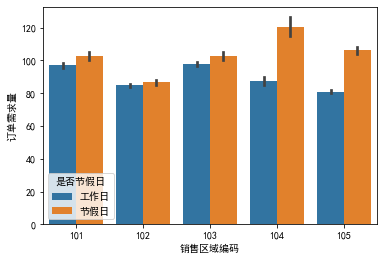

In [7]:
plt.rcParams['font.sans-serif']=['SimHei']
sns.barplot(x='销售区域编码', y='订单需求量', hue='是否节假日', data=data)

# 显示图形
plt.show()

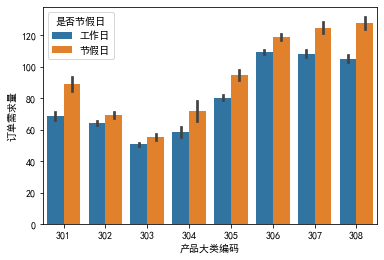

In [8]:
plt.rcParams['font.sans-serif']=['SimHei']
sns.barplot(x='产品大类编码', y='订单需求量', hue='是否节假日', data=data)

plt.show()

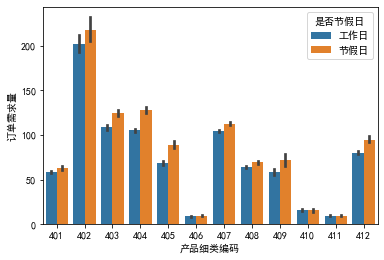

In [13]:
plt.rcParams['font.sans-serif']=['SimHei']
sns.barplot(x='产品细类编码', y='订单需求量', hue='是否节假日', data=data)

plt.show()

In [9]:
data['月']=data['订单日期'].dt.month
data['日']=data['订单日期'].dt.day

In [10]:
temp=pd.concat([data[(data['月']==6) | (data['日']==18)],data[(data['月']==11) | (data['日']==11)],data[(data['月']==12) | (data['日']==12)]])
temp

,订单日期,销售区域编码,产品编码,产品大类编码,产品细类编码,销售渠道名称,产品价格,订单需求量,是否节假日,月,日
4469,2015-09-18,103,21542,306,407,offline,681.0,53,工作日,9,18
4470,2015-09-18,103,21965,306,407,offline,570.0,158,工作日,9,18
4471,2015-09-18,103,20338,302,408,offline,920.0,34,工作日,9,18
4472,2015-09-18,103,20230,306,407,offline,863.0,158,工作日,9,18
4473,2015-09-18,103,20584,306,407,offline,786.0,54,工作日,9,18
...,...,...,...,...,...,...,...,...,...,...,...
597689,2018-12-20,102,20994,302,408,offline,843.0,59,工作日,12,20
597690,2018-12-20,102,21875,302,408,offline,762.0,502,工作日,12,20
597691,2018-12-20,102,20215,302,408,offline,2013.0,106,工作日,12,20
597692,2018-12-20,102,20195,302,408,offline,2120.0,187,工作日,12,20


In [12]:
temp_1=[]
for i in data.index:
    if i in temp.index:
        temp_1.append('促销')
    else:
        temp_1.append('非促销')

In [13]:
data['是否促销']=temp_1

In [14]:
data

,订单日期,销售区域编码,产品编码,产品大类编码,产品细类编码,销售渠道名称,产品价格,订单需求量,是否节假日,月,日,是否促销
0,2015-09-01,104,22069,307,403,offline,1114.0,19,工作日,9,1,非促销
1,2015-09-01,104,20028,301,405,offline,1012.0,12,工作日,9,1,非促销
2,2015-09-02,104,21183,307,403,online,428.0,109,工作日,9,2,非促销
3,2015-09-02,104,20448,308,404,online,962.0,3,工作日,9,2,非促销
4,2015-09-02,104,21565,307,403,offline,1400.0,3,工作日,9,2,非促销
...,...,...,...,...,...,...,...,...,...,...,...,...
597689,2018-12-20,102,20994,302,408,offline,843.0,59,工作日,12,20,促销
597690,2018-12-20,102,21875,302,408,offline,762.0,502,工作日,12,20,促销
597691,2018-12-20,102,20215,302,408,offline,2013.0,106,工作日,12,20,促销
597692,2018-12-20,102,20195,302,408,offline,2120.0,187,工作日,12,20,促销


In [15]:
group = data.groupby(['销售渠道名称','是否促销'],as_index=False).agg({'订单需求量':'mean'})

In [16]:
group

,销售渠道名称,是否促销,订单需求量
0,offline,促销,84.893961
1,offline,非促销,83.690982
2,online,促销,105.469696
3,online,非促销,115.591362


<AxesSubplot:xlabel='是否促销', ylabel='订单需求量'>

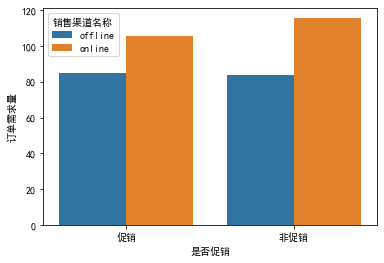

In [17]:
sns.barplot(x='是否促销', y='订单需求量', hue='销售渠道名称', data=group)

In [18]:
data_1 = data.groupby('是否促销')['订单需求量'].sum()

In [19]:
data_1

是否促销
促销     18811825
非促销    35967132
Name: 订单需求量, dtype: int64

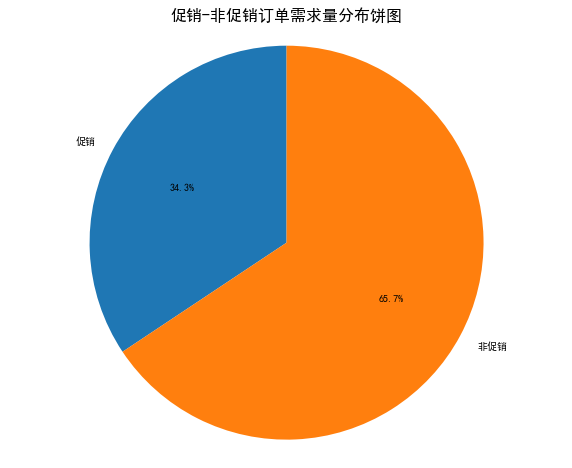

In [20]:
plt.figure(figsize=(10,8))
plt.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', startangle=90)
plt.title('促销-非促销订单需求量分布饼图', fontsize=16)
plt.axis('equal')
plt.show()

In [21]:
data_1 = data.groupby('是否促销')['订单需求量'].mean()

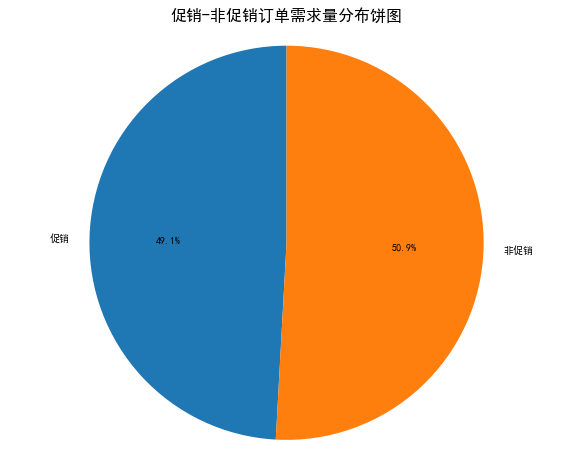

In [22]:
plt.figure(figsize=(10,8))
plt.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', startangle=90)
plt.title('促销-非促销订单需求量分布饼图', fontsize=16)
plt.axis('equal')
plt.show()

In [23]:
data_2 = data.groupby('是否节假日')['订单需求量'].mean()

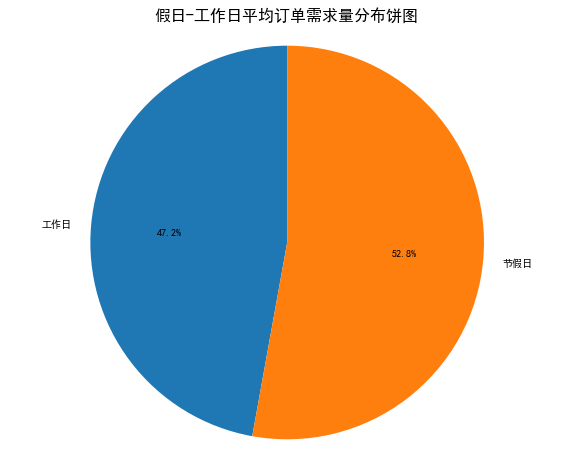

In [24]:
plt.figure(figsize=(10,8))
plt.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', startangle=90)
plt.title('假日-工作日平均订单需求量分布饼图', fontsize=16)
plt.axis('equal')
plt.show()

In [25]:
def tranf(x):
    if x <=3:
        return '春季'
    elif x <=6:
        return '夏季'
    elif x <=9:
        return '秋季'    
    else:
        return '冬季'
data['季节']=data['月'].apply(lambda x:tranf(x))

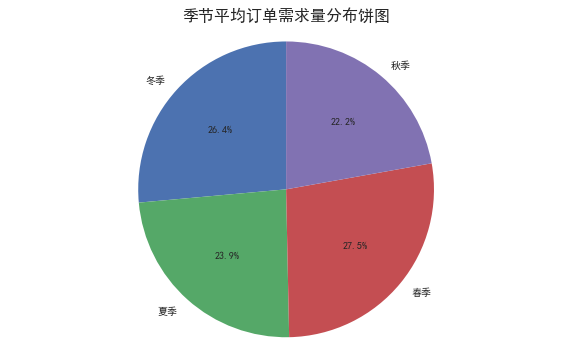

In [29]:
import matplotlib.pyplot as plt
plt.style.use('seaborn') #使用seaborn风格
plt.rcParams['font.sans-serif']=['SimHei']
data_3 = data.groupby('季节')['订单需求量'].mean()
plt.figure(figsize=(10,6))
plt.pie(data_3.values, labels=data_3.index, autopct='%1.1f%%', startangle=90)
plt.title('季节平均订单需求量分布饼图', fontsize=16)
plt.axis('equal')
plt.show()

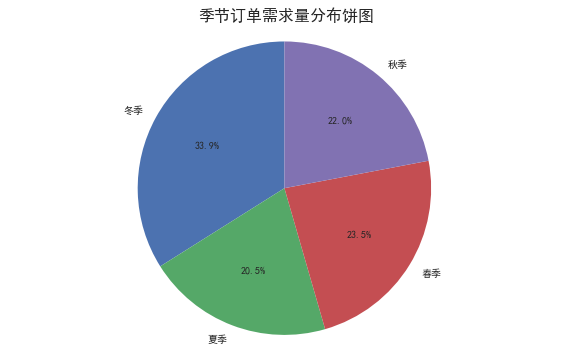

In [30]:
import matplotlib.pyplot as plt
plt.style.use('seaborn') #使用seaborn风格
plt.rcParams['font.sans-serif']=['SimHei']
data_4 = data.groupby('季节')['订单需求量'].sum()
plt.figure(figsize=(10,6))
plt.pie(data_4.values, labels=data_4.index, autopct='%1.1f%%', startangle=90)
plt.title('季节订单需求量分布饼图', fontsize=16)
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='销售区域编码', ylabel='订单需求量'>

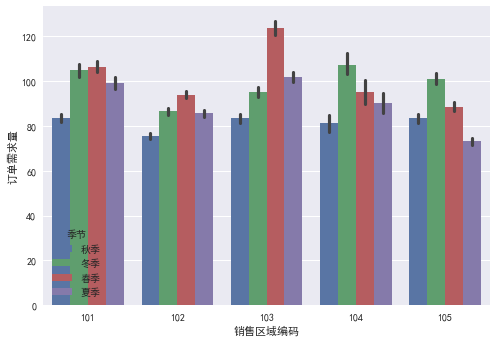

In [33]:
sns.barplot(x='销售区域编码', y='订单需求量', hue='季节', data=data)

<AxesSubplot:xlabel='产品大类编码', ylabel='订单需求量'>

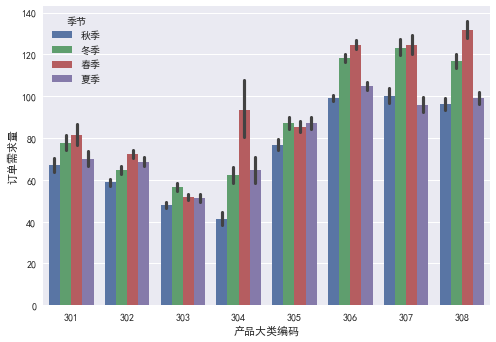

In [34]:
sns.barplot(x='产品大类编码', y='订单需求量', hue='季节', data=data)

<AxesSubplot:xlabel='产品细类编码', ylabel='订单需求量'>

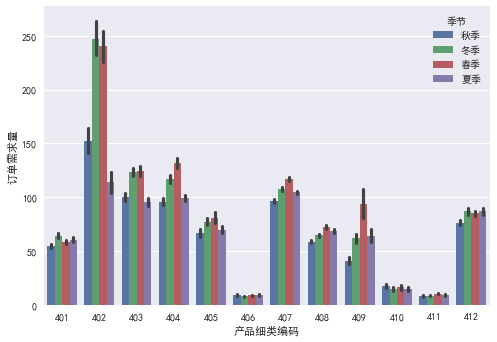

In [35]:
sns.barplot(x='产品细类编码', y='订单需求量', hue='季节', data=data)

In [25]:
import pandas as pd
data=pd.read_csv('order_train1.csv')
data.columns=['订单日期', '销售区域编码', '产品编码', '产品大类编码',
       '产品细类编码', '销售渠道名称', '产品价格', '订单需求量']
data.head()

,订单日期,销售区域编码,产品编码,产品大类编码,产品细类编码,销售渠道名称,产品价格,订单需求量
0,2015-09-01,104,22069,307,403,offline,1114.0,19
1,2015-09-01,104,20028,301,405,offline,1012.0,12
2,2015-09-02,104,21183,307,403,online,428.0,109
3,2015-09-02,104,20448,308,404,online,962.0,3
4,2015-09-02,104,21565,307,403,offline,1400.0,3


In [26]:
from datetime import datetime

data['订单日期']=pd.to_datetime(data['订单日期'], format='%Y-%m-%d')
data['订单日期_日']=data['订单日期'].dt.day
data['订单日期_周']=data['订单日期'].dt.week
data['订单日期_月']=data['订单日期'].dt.month
data=data[['订单日期','订单日期_日', '订单日期_周', '订单日期_月','销售区域编码', '产品编码', '产品大类编码', '产品细类编码','订单需求量']]
data['标识']=(data['销售区域编码'].map(str)+data['产品编码'].map(str))

In [27]:
temp=pd.read_csv('predict_sku1.csv')
temp.columns=['销售区域编码', '产品编码', '产品大类编码', '产品细类编码']
temp['标识']=(temp['销售区域编码'].map(str)+temp['产品编码'].map(str))

In [39]:
len(temp['标识'])

2619

In [28]:
# 此处所引入的包大部分为下文机器学习算法
import pandas as pd
from numpy import *
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import xgboost as xgb
import lightgbm as lgb
import numpy as np


import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) 

In [29]:
data['订单日期_年月']=data['订单日期'].map(str).apply(lambda x:x[:7])

In [30]:
%%time
ttt=[]
count=0
# 循环遍历每一组 标识
print("随机森林回归预测")
for i in temp['标识']:
    count+=1
    if count%20==0:
        print(count)
    try:
        # 创建空数组
        aa=data[data['标识']==i].groupby('订单日期_年月').sum()['订单需求量'].values
        aa=pd.DataFrame(aa,columns=['订单需求量'])
        # 当需要统计不同周期的变化情况时，需要使用数据偏移，在 Python 中使用 shift 函数实现。
        aa['shift1']=aa['订单需求量'].shift(1)
        aa['shift2']=aa['订单需求量'].shift(2)
        aa['shift3']=aa['订单需求量'].shift(3)
        # 去空
        aa.dropna(inplace=True)
        X=aa[['shift1', 'shift2', 'shift3']]
        Y=aa['订单需求量'] #目标列
        # 划分训练集 测试集
        train_x,test_x,train_y,test_y=train_test_split(X ,Y,test_size=0.1,random_state=5) 
#         print("\nXGBOOST回归:")
#         model=xgb.XGBRegressor()
#         model.fit(train_x,train_y) #训练模型
#         y_pred = model.predict(test_x) #预测值
        rf=RandomForestRegressor(max_depth=20,n_estimators=1000,random_state=0)
        rf.fit(train_x,train_y)
        y_pred = rf.predict(test_x)
        
        x_input=Y.tolist()[-3:]
        predict_forword_number=3
        predict_list=[]
        
        while len(predict_list) < predict_forword_number:
            # 
            yhat =rf.predict(np.array(x_input).reshape(1,-1))
            #预测新值
            predict_list.append(yhat[0])
            x_input=x_input[-2:]+[yhat[0]]

        ttt.append([i,mape(rf.predict(train_x),train_y),mape(rf.predict(train_x),train_y),predict_list[0],predict_list[1],predict_list[2]])
    except:
        continue

随机森林回归预测
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540
1560
1580
1600
1620
1640
1660
1680
1700
1720
1740
1760
1780
1800
1820
1840
1860
1880
1900
1920
1940
1960
1980
2000
2020
2040
2060
2080
2100
2120
2140
2160
2180
2200
2220
2240
2260
2280
2300
2320
2340
2360
2380
2400
2420
2440
2460
2480
2500
2520
2540
2560
2580
2600
Wall time: 34min 49s


In [35]:
ttt_1=pd.DataFrame(ttt,columns=['标识','训练集Mape','测试集Mape','2019年1月预测需求量','2019年2月预测需求量','2019年3月预测需求量'])

In [36]:
ttt_1['sales_region_code']=ttt_1['标识'].apply(lambda x:x[:3])
ttt_1['item_code']=ttt_1['标识'].apply(lambda x:x[3:])

In [38]:
ttt_1[['sales_region_code', 'item_code','2019年1月预测需求量', '2019年2月预测需求量',
       '2019年3月预测需求量']]

,sales_region_code,item_code,2019年1月预测需求量,2019年2月预测需求量,2019年3月预测需求量
0,101,20002,32.055,39.540,30.252
1,101,20003,533.611,320.042,558.476
2,101,20006,130.018,127.359,124.378
3,101,20014,193.971,202.105,202.105
4,101,20016,977.059,371.454,1001.156
...,...,...,...,...,...
1620,105,22058,1535.429,457.114,424.433
1621,105,22059,34.922,35.462,35.462
1622,105,22066,9077.828,7349.594,8743.287
1623,105,22083,1248.740,1215.300,1215.300


In [40]:
ttt_1.head()

,标识,训练集Mape,测试集Mape,2019年1月预测需求量,2019年2月预测需求量,2019年3月预测需求量,sales_region_code,item_code
0,10120002,0.169564,0.169564,32.055,39.540,30.252,101,20002
1,10120003,0.292929,0.292929,533.611,320.042,558.476,101,20003
2,10120006,0.235741,0.235741,130.018,127.359,124.378,101,20006
3,10120014,0.435133,0.435133,193.971,202.105,202.105,101,20014
4,10120016,0.238320,0.238320,977.059,371.454,1001.156,101,20016
